In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import random


In [3]:
data = pd.read_csv('age_gender.csv')
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


age                                                         32
ethnicity                                                    1
gender                                                       0
img_name                        20170113135328377.jpg.chip.jpg
pixels       40 25 88 118 53 24 25 35 48 67 89 101 106 113 ...
Name: 12312, dtype: object


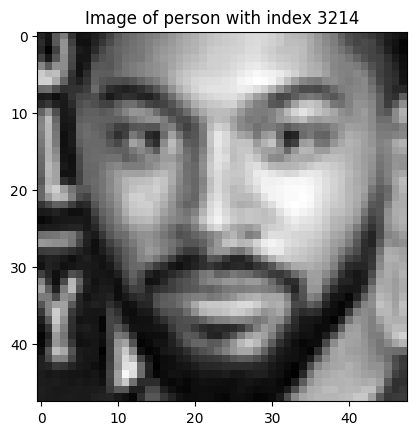

In [4]:
# Get the information of the person with index 3214 *randomly chosen*
ran_person = data.iloc[12312]
print(ran_person)

# Convert the pixel values to a numpy array and reshape it to form the image
pixels = np.array(ran_person['pixels'].split(), dtype='uint8')
image = pixels.reshape((48, 48))  # The image is 48x48 pixels

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"Image of person with index 3214")
plt.show()

Gender 0 = male | Gender 1 = female

Ethnicity:
- 0 = caucasian / white
- 1 = afro / black
- 2 = Asian (south east asian)
- 3 = Brown (souht west asian)
- 4 = Latin (south american)


In [5]:
df = data
unique_genders = df['ethnicity'].unique()
print(f"Number of unique ethincities: {unique_genders}")

Number of unique ethincities: [2 3 4 0 1]


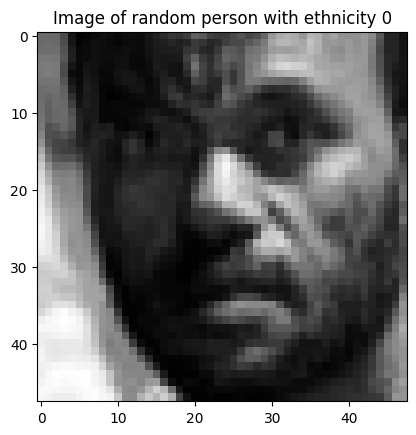

age                                                         47
ethnicity                                                    4
gender                                                       0
img_name                        20170116030339319.jpg.chip.jpg
pixels       101 100 98 71 21 4 7 12 16 13 9 14 15 12 23 32...
Name: 17537, dtype: object


In [6]:
# Filter the dataframe for ethnicity 0
ethnicity_0_df = df[df['ethnicity'] == 4]

# Select a random row from the filtered dataframe
random_person_ethnicity_0 = ethnicity_0_df.sample(n=1).iloc[0]

# Convert the pixel values to a numpy array and reshape it to form the image
pixels_ethnicity_0 = np.array(random_person_ethnicity_0['pixels'].split(), dtype='uint8')
image_ethnicity_0 = pixels_ethnicity_0.reshape((48, 48))  # The image is 48x48 pixels

# Plot the image
plt.imshow(image_ethnicity_0, cmap='gray')
plt.title(f"Image of random person with ethnicity 0")
plt.show()

# Display the person's information
print(random_person_ethnicity_0)

In [7]:
print(data.head())
print(data.info())


   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 


In [8]:
# converting the pixels to numpy arrays
def process_pixels(pixel_str):
    pixels = np.array(pixel_str.split(), dtype='float32')
    return pixels / 255.0  # Normalize pixel values between 0 and 1

data['pixels'] = data['pixels'].apply(process_pixels)


In [9]:
# reshape in to 48*48
X = np.array(data['pixels'].tolist())
X = X.reshape(-1, 1, 48, 48)  # Reshape to 1 channel image (grayscale)


In [10]:
gender_encoder = LabelEncoder()
y_gender = gender_encoder.fit_transform(data['gender'])

ethnicity_encoder = LabelEncoder()
y_ethnicity = ethnicity_encoder.fit_transform(data['ethnicity'])

y_age = data['age'].values.astype('float32')
y_age = y_age / data['age'].max()  # Normalize age between 0 and 1


X_train, X_test, y_gender_train, y_gender_test, y_ethnicity_train, y_ethnicity_test, y_age_train, y_age_test = train_test_split(
    X, y_gender, y_ethnicity, y_age, test_size=0.2, random_state=42, stratify=y_ethnicity)

class FaceDataset(Dataset):
    def __init__(self, images, genders, ethnicities, ages):
        self.images = torch.tensor(images, dtype=torch.float32)
        self.genders = torch.tensor(genders, dtype=torch.long) 
        self.ethnicities = torch.tensor(ethnicities, dtype=torch.long)
        self.ages = torch.tensor(ages, dtype=torch.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        gender = self.genders[idx]
        ethnicity = self.ethnicities[idx]
        age = self.ages[idx]
        return image, gender, ethnicity, age

batch_size = 64

train_dataset = FaceDataset(X_train, y_gender_train, y_ethnicity_train, y_age_train)
test_dataset = FaceDataset(X_test, y_gender_test, y_ethnicity_test, y_age_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
# 7 steps for more data preprocessing with stratified train-test split

# 1. Group ages into 10-year intervals
data['age_group'] = (data['age'] // 10) * 10

# 2. Create the combination column
data['combination'] = data['gender'].astype(str) + '_' + \
                      data['ethnicity'].astype(str) + '_' + \
                      data['age_group'].astype(str)

# 3. Identify and remove observations with unique combinations
combination_counts = data['combination'].value_counts()
unique_combinations = combination_counts[combination_counts == 1].index.tolist()

# Report the number of observations before removal
before_removal = data.shape[0]
print(f"Number of observations before removal: {before_removal}")

# Remove observations with unique combinations
data = data[~data['combination'].isin(unique_combinations)].reset_index(drop=True)

# Report the number of observations after removal
after_removal = data.shape[0]
removed = before_removal - after_removal
print(f"Number of observations after removal: {after_removal}")
print(f"Number of observations removed: {removed}")

# 4. Encode 'gender' and 'ethnicity' for labels (y)
gender_encoder = LabelEncoder()
y_gender = gender_encoder.fit_transform(data['gender'])

ethnicity_encoder = LabelEncoder()
y_ethnicity = ethnicity_encoder.fit_transform(data['ethnicity'])

# Normalize 'age' between 0 and 1
y_age = data['age'].values.astype('float32')
y_age = y_age / data['age'].max()

# 5. Encode features for stratification
# Reuse the encoded labels
data['gender_encoded'] = y_gender
data['ethnicity_encoded'] = y_ethnicity

# Encode 'age_group' for stratification
age_group_encoder = LabelEncoder()
data['age_group_encoded'] = age_group_encoder.fit_transform(data['age_group'])

# Create the stratification label
data['stratify_label'] = data['gender_encoded'].astype(str) + '_' + \
                         data['ethnicity_encoded'].astype(str) + '_' + \
                         data['age_group_encoded'].astype(str)

# Verify that all stratify_labels have more than one observation
label_counts = data['stratify_label'].value_counts()
if (label_counts == 1).any():
    print("Warning: Some stratify_labels still have only one observation.")
else:
    print("All stratify_labels have more than one observation. Proceeding with train_test_split.")

# 6. Ensure 'X' is aligned with 'data'
X = X[data.index]

# 7. Proceed with train_test_split
X_train, X_test, y_gender_train, y_gender_test, y_ethnicity_train, y_ethnicity_test, y_age_train, y_age_test = train_test_split(
    X,
    y_gender,
    y_ethnicity,
    y_age,
    test_size=0.2,
    random_state=42,
    stratify=data['stratify_label']
)


Number of observations before removal: 23705
Number of observations after removal: 23698
Number of observations removed: 7
All stratify_labels have more than one observation. Proceeding with train_test_split.


In [12]:
class FaceDataset(Dataset):
    def __init__(self, images, genders, ethnicities, ages):
        self.images = torch.tensor(images, dtype=torch.float32)
        self.genders = torch.tensor(genders, dtype=torch.long)
        self.ethnicities = torch.tensor(ethnicities, dtype=torch.long)
        self.ages = torch.tensor(ages, dtype=torch.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        gender = self.genders[idx]
        ethnicity = self.ethnicities[idx]
        age = self.ages[idx]
        return image, gender, ethnicity, age

batch_size = 64

train_dataset = FaceDataset(X_train, y_gender_train, y_ethnicity_train, y_age_train)
test_dataset = FaceDataset(X_test, y_gender_test, y_ethnicity_test, y_age_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [13]:
# CNN model
class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()

        # Shared convolutional layers
        self.conv_layers = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # Input channels = 1
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),  # Output: 32 x 24 x 24

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),  # Output: 64 x 12 x 12

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),  # Output: 128 x 6 x 6

            # **New Block 4**
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),  # Output: 256 x 3 x 3
        )

        # Global Average Pooling
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # Output: 256 x 1 x 1

        # Flatten layer is no longer needed due to Global Average Pooling
        self.dropout = nn.Dropout(0.5)

        # Gender classification branch
        self.gender_fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 2)
        )

        # Ethnicity classification branch
        self.ethnicity_fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 5)
        )

        # Age regression branch
        self.age_fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = self.dropout(x)

        gender_logits = self.gender_fc(x)
        ethnicity_logits = self.ethnicity_fc(x)
        age_output = self.age_fc(x)

        return gender_logits, ethnicity_logits, age_output.squeeze()
    

In [14]:
# MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, num_classes_age=None):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()

        # Output layers
        if num_classes_age:
            # Classification for age
            self.age_head = nn.Linear(256, num_classes_age)
        else:
            # Regression for age
            self.age_head = nn.Linear(256, 1)

        self.ethnicity_head = nn.Linear(256, len(np.unique(y_ethnicity_train)))
        self.gender_head = nn.Linear(256, len(np.unique(y_gender_train)))

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)

        x = self.fc2(x)
        x = self.relu2(x)

        x = self.fc3(x)
        x = self.relu3(x)

        # Outputs
        age_output = self.age_head(x)
        ethnicity_output = self.ethnicity_head(x)
        gender_output = self.gender_head(x)

        return {'age': age_output, 'ethnicity': ethnicity_output, 'gender': gender_output}

In [15]:
# LSTM model
class LSTMclass(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes_gender, num_classes_ethnicity):
        super(LSTMclass, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc_age = nn.Linear(hidden_size, 1)
        self.fc_gender = nn.Linear(hidden_size, num_classes_gender)
        self.fc_ethnicity = nn.Linear(hidden_size, num_classes_ethnicity)

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # out: [batch_size, seq_len, hidden_size]
        

        out = out[:, -1, :]  # Last timestep: [batch_size, hidden_size]
        

        age_output = self.fc_age(out)  # [batch_size, 1]
        gender_logits = self.fc_gender(out)  # [batch_size, num_classes_gender]
        ethnicity_logits = self.fc_ethnicity(out)  # [batch_size, num_classes_ethnicity]

        return {
            'age': age_output,
            'gender': gender_logits,
            'ethnicity': ethnicity_logits
        }


In [16]:
# Other parameters
input_size = 48*48
hidden_size = 128
num_layers = 2
num_classes_gender = 2
num_classes_ethnicity = 5
num_classes_age = None  # Set to number of age categories if using classification

# Set device
CNNdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MLPdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LSTMdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CNNmodel = MultiTaskCNN().to(CNNdevice)
MLPmodel = MLPClassifier(input_size=input_size, num_classes_age=num_classes_age).to(MLPdevice)
LSTMmodel = LSTMclass(input_size, hidden_size, num_layers, num_classes_gender, num_classes_ethnicity).to(LSTMdevice)
print(CNNdevice)
print(MLPdevice)
print(LSTMdevice)

# Loss functions
criterion_gender = nn.CrossEntropyLoss()
criterion_ethnicity = nn.CrossEntropyLoss()
criterion_age = nn.MSELoss()

# Optimizer
CNNoptimizer = optim.Adam(CNNmodel.parameters(), lr=0.001)
MLPoptimizer = optim.Adam(MLPmodel.parameters(), lr=0.001)
LSTMoptimizer = optim.Adam(LSTMmodel.parameters(), lr=0.001)

num_epochs = 50


cuda
cuda
cuda


In [17]:
# training the CNN model

for epoch in range(num_epochs):
    CNNmodel.train()
    running_loss = 0.0
    running_gender_correct = 0
    running_ethnicity_correct = 0
    running_age_loss = 0.0

    for images, genders, ethnicities, ages in train_loader:
        images = images.to(CNNdevice)
        genders = genders.to(CNNdevice)
        ethnicities = ethnicities.to(CNNdevice)
        ages = ages.to(CNNdevice)

        CNNoptimizer.zero_grad()

        gender_logits, ethnicity_logits, age_output = CNNmodel(images)

        loss_gender = criterion_gender(gender_logits, genders)
        loss_ethnicity = criterion_ethnicity(ethnicity_logits, ethnicities)
        loss_age = criterion_age(age_output, ages)

        # Total loss with weighting
        loss = loss_gender + loss_ethnicity + 0.25 * loss_age

        loss.backward()
        CNNoptimizer.step()

        running_loss += loss.item()
        _, gender_preds = torch.max(gender_logits, 1)
        _, ethnicity_preds = torch.max(ethnicity_logits, 1)

        running_gender_correct += (gender_preds == genders).sum().item()
        running_ethnicity_correct += (ethnicity_preds == ethnicities).sum().item()
        running_age_loss += loss_age.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_gender_acc = running_gender_correct / len(train_loader.dataset)
    epoch_ethnicity_acc = running_ethnicity_correct / len(train_loader.dataset)
    epoch_age_loss = running_age_loss / len(train_loader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, '
          f'Gender Acc: {epoch_gender_acc:.4f}, '
          f'Ethnicity Acc: {epoch_ethnicity_acc:.4f}, '
          f'Age Loss: {epoch_age_loss:.4f}')


Epoch 1/50, Loss: 0.0312, Gender Acc: 0.6887, Ethnicity Acc: 0.4481, Age Loss: 0.0429
Epoch 2/50, Loss: 0.0278, Gender Acc: 0.7744, Ethnicity Acc: 0.5236, Age Loss: 0.0226
Epoch 3/50, Loss: 0.0265, Gender Acc: 0.7959, Ethnicity Acc: 0.5549, Age Loss: 0.0199
Epoch 4/50, Loss: 0.0256, Gender Acc: 0.8095, Ethnicity Acc: 0.5758, Age Loss: 0.0188
Epoch 5/50, Loss: 0.0250, Gender Acc: 0.8166, Ethnicity Acc: 0.5841, Age Loss: 0.0173
Epoch 6/50, Loss: 0.0244, Gender Acc: 0.8272, Ethnicity Acc: 0.5996, Age Loss: 0.0170
Epoch 7/50, Loss: 0.0238, Gender Acc: 0.8322, Ethnicity Acc: 0.6066, Age Loss: 0.0166
Epoch 8/50, Loss: 0.0233, Gender Acc: 0.8441, Ethnicity Acc: 0.6136, Age Loss: 0.0159
Epoch 9/50, Loss: 0.0227, Gender Acc: 0.8497, Ethnicity Acc: 0.6224, Age Loss: 0.0162
Epoch 10/50, Loss: 0.0220, Gender Acc: 0.8480, Ethnicity Acc: 0.6356, Age Loss: 0.0159
Epoch 11/50, Loss: 0.0213, Gender Acc: 0.8602, Ethnicity Acc: 0.6442, Age Loss: 0.0155
Epoch 12/50, Loss: 0.0206, Gender Acc: 0.8655, Ethni

In [18]:
# Training the MLP model

for epoch in range(num_epochs):
    MLPmodel.train()
    running_loss = 0.0

    for images, genders, ethnicities, ages in train_loader:
        images = images.to(MLPdevice)
        genders = genders.to(MLPdevice)
        ethnicities = ethnicities.to(MLPdevice)
        ages = ages.to(MLPdevice)

        # Flatten the images tensor
        images = images.view(images.size(0), -1)  # Flatten to (batch_size, 2304)

        MLPoptimizer.zero_grad()
        gender_logits, ethnicity_logits, age_output = MLPmodel(images)
        
        # Forward pass
        outputs = MLPmodel(images)
        
        # Extract outputs
        gender_logits = outputs['gender']
        ethnicity_logits = outputs['ethnicity']
        age_output = outputs['age']

        # Calculate losses
        loss_age = criterion_age(age_output, ages)
        loss_ethnicity = criterion_ethnicity(ethnicity_logits, ethnicities)
        loss_gender = criterion_gender(gender_logits, genders)

        loss = loss_age + loss_ethnicity + loss_gender
        loss.backward()
        MLPoptimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

c:\Users\Jonas\OneDrive - OsloMet\H-24\CI\ExamProject\.venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Jonas\OneDrive - OsloMet\H-24\CI\ExamProject\.venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 2.0574
Epoch [2/50], Loss: 1.8918
Epoch [3/50], Loss: 1.8229
Epoch [4/50], Loss: 1.7900
Epoch [5/50], Loss: 1.7658
Epoch [6/50], Loss: 1.7407
Epoch [7/50], Loss: 1.7224
Epoch [8/50], Loss: 1.7214
Epoch [9/50], Loss: 1.7039
Epoch [10/50], Loss: 1.6958
Epoch [11/50], Loss: 1.6796
Epoch [12/50], Loss: 1.6726
Epoch [13/50], Loss: 1.6665
Epoch [14/50], Loss: 1.6411
Epoch [15/50], Loss: 1.6512
Epoch [16/50], Loss: 1.6303
Epoch [17/50], Loss: 1.6268
Epoch [18/50], Loss: 1.6356
Epoch [19/50], Loss: 1.6156
Epoch [20/50], Loss: 1.6220
Epoch [21/50], Loss: 1.6034
Epoch [22/50], Loss: 1.6016
Epoch [23/50], Loss: 1.5926
Epoch [24/50], Loss: 1.5833
Epoch [25/50], Loss: 1.5754
Epoch [26/50], Loss: 1.5742
Epoch [27/50], Loss: 1.5748
Epoch [28/50], Loss: 1.5593
Epoch [29/50], Loss: 1.5533
Epoch [30/50], Loss: 1.5574
Epoch [31/50], Loss: 1.5404
Epoch [32/50], Loss: 1.5337
Epoch [33/50], Loss: 1.5265
Epoch [34/50], Loss: 1.5168
Epoch [35/50], Loss: 1.5123
Epoch [36/50], Loss: 1.5065
E

In [19]:
print(images.shape)

torch.Size([14, 2304])


In [20]:
print(48*64)

3072


In [21]:
print(images.shape)

torch.Size([14, 2304])


In [22]:
# Training the LSTM model

for epoch in range(num_epochs):
    LSTMmodel.train()
    running_loss = 0.0
    running_gender_correct = 0
    running_ethnicity_correct = 0
    running_age_loss = 0.0

    for images, genders, ethnicities, ages in train_loader:
        # Move data to device
        images = images.to(LSTMdevice)
        genders = genders.to(LSTMdevice)
        ethnicities = ethnicities.to(LSTMdevice)
        ages = ages.to(LSTMdevice)

        LSTMoptimizer.zero_grad()

        images = images.view(images.size(0), 1, -1)  # Flatten 48x48 into 2304 features, seq_len=1
        
        # Forward pass
        outputs = LSTMmodel(images)

        # Extract outputs
        gender_logits = outputs['gender']
        ethnicity_logits = outputs['ethnicity']
        age_output = outputs['age']

        # Calculate losses
        loss_gender = criterion_gender(gender_logits, genders)
        loss_ethnicity = criterion_ethnicity(ethnicity_logits, ethnicities)
        loss_age = criterion_age(age_output.squeeze(-1), ages)

        # Total loss with weighting
        loss = loss_gender + loss_ethnicity + 0.25 * loss_age

        # Backward pass and optimization
        loss.backward()
        LSTMoptimizer.step()

        # Update metrics
        running_loss += loss.item()
        _, gender_preds = torch.max(gender_logits, 1)
        _, ethnicity_preds = torch.max(ethnicity_logits, 1)

        running_gender_correct += (gender_preds == genders).sum().item()
        running_ethnicity_correct += (ethnicity_preds == ethnicities).sum().item()
        running_age_loss += loss_age.item() * images.size(0)

    # Compute epoch metrics
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_gender_acc = running_gender_correct / len(train_loader.dataset)
    epoch_ethnicity_acc = running_ethnicity_correct / len(train_loader.dataset)
    epoch_age_loss = running_age_loss / len(train_loader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, '
          f'Gender Acc: {epoch_gender_acc:.4f}, '
          f'Ethnicity Acc: {epoch_ethnicity_acc:.4f}, '
          f'Age Loss: {epoch_age_loss:.4f}')


Epoch 1/50, Loss: 0.0314, Gender Acc: 0.6869, Ethnicity Acc: 0.4363, Age Loss: 0.0281
Epoch 2/50, Loss: 0.0292, Gender Acc: 0.7472, Ethnicity Acc: 0.4719, Age Loss: 0.0254
Epoch 3/50, Loss: 0.0282, Gender Acc: 0.7625, Ethnicity Acc: 0.4928, Age Loss: 0.0235
Epoch 4/50, Loss: 0.0279, Gender Acc: 0.7629, Ethnicity Acc: 0.5115, Age Loss: 0.0237
Epoch 5/50, Loss: 0.0274, Gender Acc: 0.7730, Ethnicity Acc: 0.5256, Age Loss: 0.0228
Epoch 6/50, Loss: 0.0270, Gender Acc: 0.7784, Ethnicity Acc: 0.5351, Age Loss: 0.0221
Epoch 7/50, Loss: 0.0269, Gender Acc: 0.7796, Ethnicity Acc: 0.5364, Age Loss: 0.0221
Epoch 8/50, Loss: 0.0266, Gender Acc: 0.7855, Ethnicity Acc: 0.5446, Age Loss: 0.0217
Epoch 9/50, Loss: 0.0264, Gender Acc: 0.7885, Ethnicity Acc: 0.5458, Age Loss: 0.0214
Epoch 10/50, Loss: 0.0263, Gender Acc: 0.7877, Ethnicity Acc: 0.5524, Age Loss: 0.0212
Epoch 11/50, Loss: 0.0261, Gender Acc: 0.7911, Ethnicity Acc: 0.5594, Age Loss: 0.0208
Epoch 12/50, Loss: 0.0262, Gender Acc: 0.7909, Ethni

In [23]:
# Select a sample from the test dataset (CNN)
sample_idx = random.randint(0, len(X_test))   # Change this index to test other samples
sample_image = X_test[sample_idx]
sample_gender = y_gender_test[sample_idx]
sample_ethnicity = y_ethnicity_test[sample_idx]
sample_age = y_age_test[sample_idx]

# Prepare the image
sample_image_tensor = torch.tensor(sample_image, dtype=torch.float32).to(CNNdevice)
sample_image_tensor = sample_image_tensor.unsqueeze(0)  # Shape: [1, 1, 48, 48]

CNNmodel.eval()
with torch.no_grad():
    gender_logits, ethnicity_logits, age_output = CNNmodel(sample_image_tensor)
    
    # Apply softmax to get probabilities
    gender_prob = nn.functional.softmax(gender_logits, dim=1)
    ethnicity_prob = nn.functional.softmax(ethnicity_logits, dim=1)
    
    # Get predicted classes
    gender_pred = torch.argmax(gender_prob, dim=1).cpu().numpy()[0]
    ethnicity_pred = torch.argmax(ethnicity_prob, dim=1).cpu().numpy()[0]
    
    # Get confidence levels
    gender_confidence = gender_prob[0, gender_pred].cpu().numpy() * 100  # Convert to percentage
    ethnicity_confidence = ethnicity_prob[0, ethnicity_pred].cpu().numpy() * 100  # Convert to percentage
    
    # Denormalize age prediction
    age_pred = age_output.item() * data['age'].max()
    
# Decode predictions
predicted_gender = gender_encoder.inverse_transform([gender_pred])[0]
predicted_ethnicity = ethnicity_encoder.inverse_transform([ethnicity_pred])[0]
predicted_age = age_pred

# Actual values
actual_gender = gender_encoder.inverse_transform([sample_gender])[0]
actual_ethnicity = ethnicity_encoder.inverse_transform([sample_ethnicity])[0]
actual_age = sample_age * data['age'].max()

# Display the results
print(f"Predicted Gender: {predicted_gender} (Confidence: {gender_confidence:.2f}%)")
print(f"Actual Gender: {actual_gender}\n")

print(f"Predicted Ethnicity: {predicted_ethnicity} (Confidence: {ethnicity_confidence:.2f}%)")
print(f"Actual Ethnicity: {actual_ethnicity}\n")

print(f"Predicted Age: {predicted_age:.1f}")
print(f"Actual Age: {actual_age:.1f}")


Predicted Gender: 1 (Confidence: 99.64%)
Actual Gender: 0

Predicted Ethnicity: 0 (Confidence: 100.00%)
Actual Ethnicity: 3

Predicted Age: 36.2
Actual Age: 45.0


In [24]:
# MLP Evaluation
MLPmodel.eval()
with torch.no_grad():
    total = 0
    correct_age = 0
    correct_ethnicity = 0
    correct_gender = 0

    sum_squared_error = 0
    sum_absolute_error = 0
    age_predictions = []
    age_true_values = []

    for images, ages, genders, ethnicities in test_loader:
        # Move data to the appropriate device
        images = images.to(MLPdevice).view(images.size(0), -1)  # Flatten to [batch_size, 2304]

        labels = {
            'age': ages.to(MLPdevice),
            'gender': genders.to(MLPdevice),
            'ethnicity': ethnicities.to(MLPdevice),
        }

        # Forward pass
        outputs = MLPmodel(images)

        # Age Regression Evaluation
        age_pred = outputs['age'].squeeze()
        age_true = labels['age'].float()

        # Collect predictions and true values for R² calculation
        age_predictions.extend(age_pred.cpu().numpy())
        age_true_values.extend(age_true.cpu().numpy())

        # Calculate squared errors
        sum_squared_error += ((age_pred - age_true) ** 2).sum().item()
        sum_absolute_error += torch.abs(age_pred - age_true).sum().item()

        # Ethnicity Evaluation
        _, predicted_ethnicity = torch.max(outputs['ethnicity'], 1)
        correct_ethnicity += (predicted_ethnicity == labels['ethnicity']).sum().item()

        # Gender Evaluation
        _, predicted_gender = torch.max(outputs['gender'], 1)
        correct_gender += (predicted_gender == labels['gender']).sum().item()

        total += labels['age'].size(0)

    # Metrics for Age Regression
    mse = sum_squared_error / total
    rmse = np.sqrt(mse)
    mae = sum_absolute_error / total

    # R² calculation
    age_predictions = np.array(age_predictions)
    age_true_values = np.array(age_true_values)
    mean_age_true = np.mean(age_true_values)
    total_variance = np.sum((age_true_values - mean_age_true) ** 2)
    r_squared = 1 - (sum_squared_error / total_variance)

    # Metrics for Ethnicity and Gender
    ethnicity_acc = 100 * correct_ethnicity / total
    gender_acc = 100 * correct_gender / total

    # Print all metrics
    print(f'Test Age MAE: {mae:.2f}')
    print(f'Test Age MSE: {mse:.2f}')
    print(f'Test Age RMSE: {rmse:.2f}')
    print(f'Test Age R²: {r_squared:.2f}')
  
    print(f'Test Ethnicity Accuracy: {ethnicity_acc:.2f}%')
    print(f'Test Gender Accuracy: {gender_acc:.2f}%')


Test Age MAE: 0.49
Test Age MSE: 0.28
Test Age RMSE: 0.53
Test Age R²: -0.12
Test Ethnicity Accuracy: 0.00%
Test Gender Accuracy: 31.98%


In [25]:
# Reshape the input tensor for LSTM
sample_image_tensor = sample_image_tensor.view(sample_image_tensor.size(0), 1, -1).to(LSTMdevice)  # [batch_size, seq_len=1, input_dim=2304]

# LSTM Evaluation
LSTMmodel.eval()
with torch.no_grad():
    outputs = LSTMmodel(sample_image_tensor)
    
    # Extract outputs
    gender_logits = outputs['gender']
    ethnicity_logits = outputs['ethnicity']
    age_output = outputs['age']
    
    # Apply softmax to get probabilities
    gender_prob = nn.functional.softmax(gender_logits, dim=1)
    ethnicity_prob = nn.functional.softmax(ethnicity_logits, dim=1)
    
    # Get predicted classes
    gender_pred = torch.argmax(gender_prob, dim=1).cpu().numpy()[0]
    ethnicity_pred = torch.argmax(ethnicity_prob, dim=1).cpu().numpy()[0]
    
    # Get confidence levels
    gender_confidence = gender_prob[0, gender_pred].cpu().numpy() * 100  # Convert to percentage
    ethnicity_confidence = ethnicity_prob[0, ethnicity_pred].cpu().numpy() * 100  # Convert to percentage
    
    # Denormalize age prediction
    age_pred = age_output.item() * data['age'].max()

# Decode predictions
predicted_gender = gender_encoder.inverse_transform([gender_pred])[0]
predicted_ethnicity = ethnicity_encoder.inverse_transform([ethnicity_pred])[0]
predicted_age = age_pred

# Actual values
actual_gender = gender_encoder.inverse_transform([sample_gender])[0]
actual_ethnicity = ethnicity_encoder.inverse_transform([sample_ethnicity])[0]
actual_age = sample_age * data['age'].max()

# Display the results
print(f"Predicted Gender: {predicted_gender} (Confidence: {gender_confidence:.2f}%)")
print(f"Actual Gender: {actual_gender}\n")

print(f"Predicted Ethnicity: {predicted_ethnicity} (Confidence: {ethnicity_confidence:.2f}%)")
print(f"Actual Ethnicity: {actual_ethnicity}\n")

print(f"Predicted Age: {predicted_age:.1f}")
print(f"Actual Age: {actual_age:.1f}")


Predicted Gender: 0 (Confidence: 52.19%)
Actual Gender: 0

Predicted Ethnicity: 0 (Confidence: 73.73%)
Actual Ethnicity: 3

Predicted Age: 43.9
Actual Age: 45.0


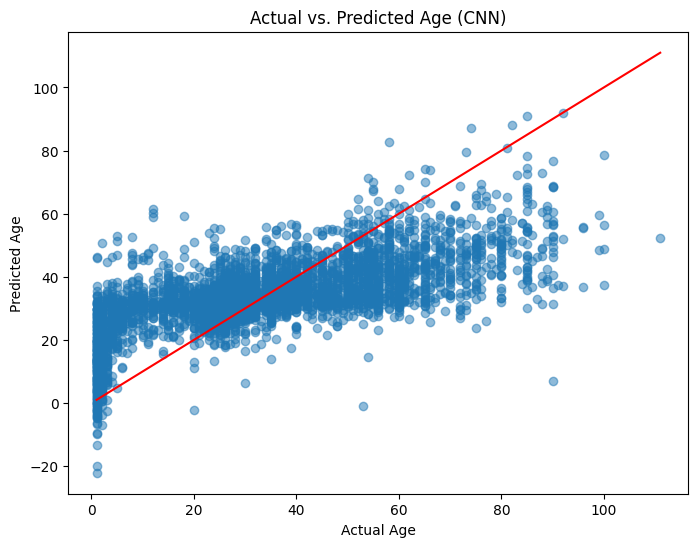

In [26]:
# Predict ages on the test set (CNN)
CNNmodel.eval()
all_ages_actual = []
all_ages_predicted = []

with torch.no_grad():
    for images, _, _, ages in test_loader:
        images = images.to(CNNdevice)
        ages = ages.to(CNNdevice)
        
        _, _, age_outputs = CNNmodel(images)
        age_preds = age_outputs.cpu().numpy() * data['age'].max()
        ages_actual = ages.cpu().numpy() * data['age'].max()
        
        all_ages_predicted.extend(age_preds)
        all_ages_actual.extend(ages_actual)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_ages_actual, all_ages_predicted, alpha=0.5)
plt.plot([min(all_ages_actual), max(all_ages_actual)], [min(all_ages_actual), max(all_ages_actual)], 'r')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age (CNN)')
plt.show()


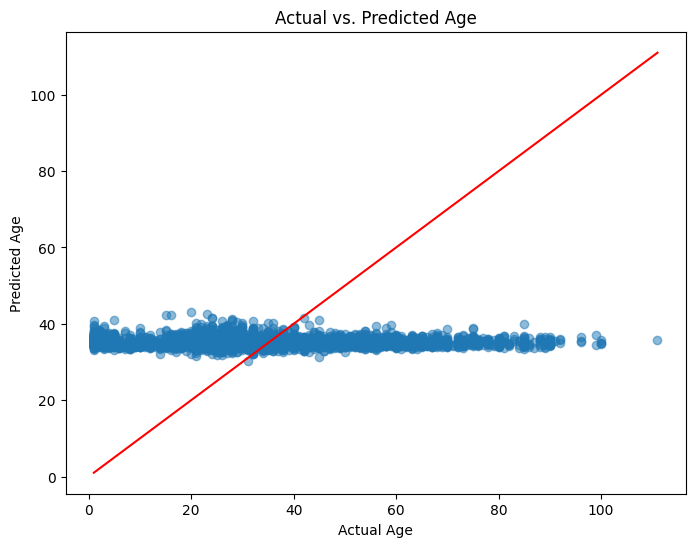

In [27]:
# Predict ages on the test set (MLP)
MLPmodel.eval()
all_ages_actual = []
all_ages_predicted = []

with torch.no_grad():
    for images, _, _, ages in test_loader:
        # Move data to device and flatten images
        images = images.to(MLPdevice).view(images.size(0), -1)  # Flatten to [batch_size, 2304]
        ages = ages.to(MLPdevice)
        
        # Forward pass
        outputs = MLPmodel(images)
        age_outputs = outputs['age']  # Extract age predictions from the dictionary
        
        # Convert predictions and actual values back to original scale
        age_preds = age_outputs.cpu().numpy() * data['age'].max()
        ages_actual = ages.cpu().numpy() * data['age'].max()
        
        # Collect all predictions and actual values
        all_ages_predicted.extend(age_preds)
        all_ages_actual.extend(ages_actual)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_ages_actual, all_ages_predicted, alpha=0.5)
plt.plot([min(all_ages_actual), max(all_ages_actual)], [min(all_ages_actual), max(all_ages_actual)], 'r')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age')
plt.show()


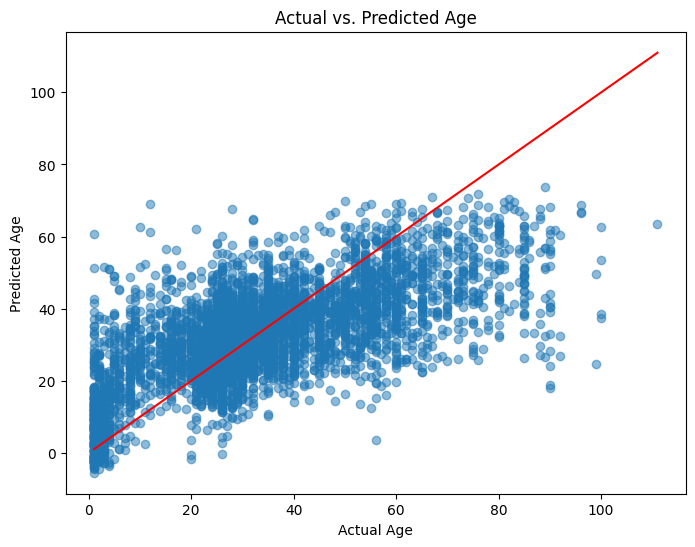

In [28]:
# Predict ages on the test set (LSTM)
LSTMmodel.eval()
all_ages_actual = []
all_ages_predicted = []

with torch.no_grad():
    for images, _, _, ages in test_loader:
        # Reshape images for LSTM input
        images = images.to(LSTMdevice).view(images.size(0), 1, -1)  # Flatten to [batch_size, seq_len=1, input_dim=2304]

        ages = ages.to(LSTMdevice)
        
        # Forward pass
        outputs = LSTMmodel(images)
        age_outputs = outputs['age']  # Extract age predictions from the dictionary
        
        # Convert predictions and actual values back to original scale
        age_preds = age_outputs.cpu().numpy() * data['age'].max()
        ages_actual = ages.cpu().numpy() * data['age'].max()
        
        # Collect all predictions and actual values
        all_ages_predicted.extend(age_preds)
        all_ages_actual.extend(ages_actual)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_ages_actual, all_ages_predicted, alpha=0.5)
plt.plot([min(all_ages_actual), max(all_ages_actual)], [min(all_ages_actual), max(all_ages_actual)], 'r')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age')
plt.show()


In [31]:
# save models 
print('Save the CNN model, give the file a name:')
cnn_model_name = input()
torch.save(CNNmodel.state_dict(), cnn_model_name)

print('Save the MLP model, give the file a name:')
mlp_model_name = input()
torch.save(MLPmodel.state_dict(), mlp_model_name)

print('Save the LSTM model, give the file a name:')
lstm_model_name = input()
torch.save(LSTMmodel.state_dict(), lstm_model_name)



print("Models saved")



Save the CNN model, give the file a name:
Save the MLP model, give the file a name:
Save the LSTM model, give the file a name:
Models saved


In [32]:
# load models
CNNmodel = MultiTaskCNN() 
CNNmodel.load_state_dict(torch.load(cnn_model_name))
CNNmodel.to(CNNdevice)

MLPmodel = MLPClassifier(input_size, num_classes_age) 
MLPmodel.load_state_dict(torch.load(mlp_model_name))
MLPmodel.to(MLPdevice)

LSTMmodel = LSTMclass(input_size, hidden_size, num_layers, num_classes_gender, num_classes_ethnicity)
LSTMmodel.load_state_dict(torch.load(lstm_model_name))
LSTMmodel.to(LSTMdevice)


C:\Users\Jonas\AppData\Local\Temp\ipykernel_14588\240441554.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  CNNmodel.load_state_dict(torch.load(cnn_model_name))
C:\Users

LSTMclass(
  (lstm): LSTM(2304, 128, num_layers=2, batch_first=True)
  (fc_age): Linear(in_features=128, out_features=1, bias=True)
  (fc_gender): Linear(in_features=128, out_features=2, bias=True)
  (fc_ethnicity): Linear(in_features=128, out_features=5, bias=True)
)

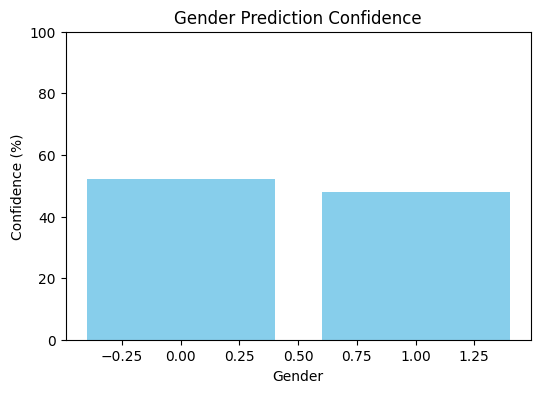

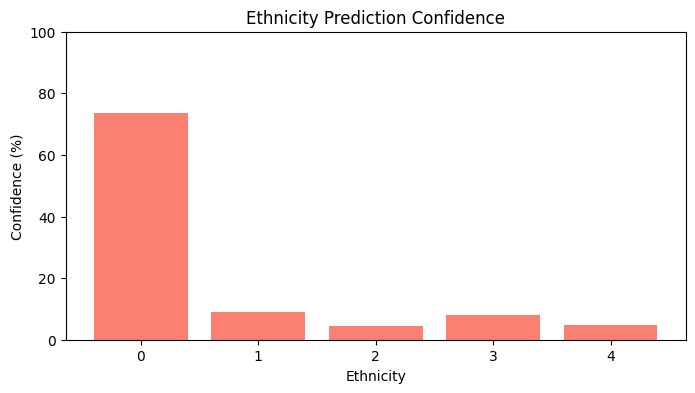

In [33]:
# Plot gender confidence levels

# Get class probabilities and labels for gender
gender_probs = gender_prob.cpu().numpy()[0] * 100  # Convert to percentages
gender_classes = gender_encoder.inverse_transform(np.arange(len(gender_probs)))

# Get class probabilities and labels for ethnicity
ethnicity_probs = ethnicity_prob.cpu().numpy()[0] * 100  # Convert to percentages
ethnicity_classes = ethnicity_encoder.inverse_transform(np.arange(len(ethnicity_probs)))

plt.figure(figsize=(6, 4))
plt.bar(gender_classes, gender_probs, color='skyblue')
plt.title('Gender Prediction Confidence')
plt.ylabel('Confidence (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()

# Plot ethnicity confidence levels
plt.figure(figsize=(8, 4))
plt.bar(ethnicity_classes, ethnicity_probs, color='salmon')
plt.title('Ethnicity Prediction Confidence')
plt.ylabel('Confidence (%)')
plt.xlabel('Ethnicity')
plt.ylim(0, 100)
plt.show()

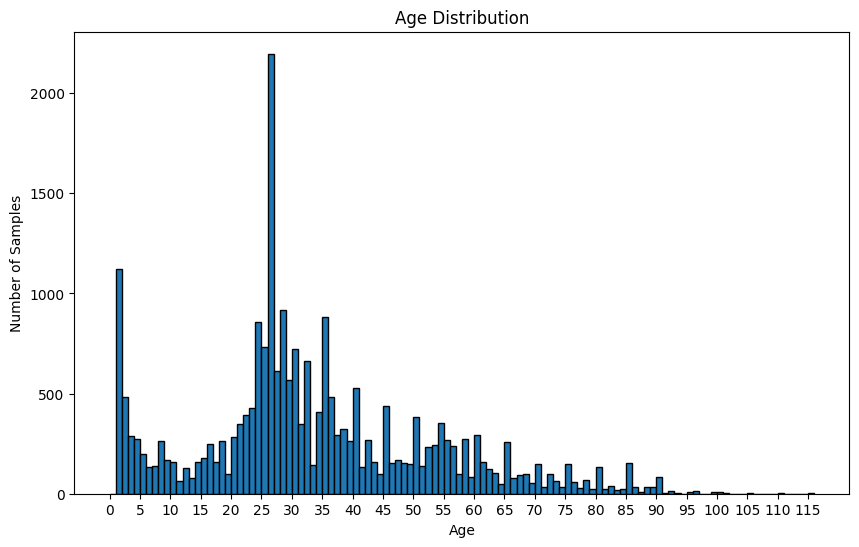

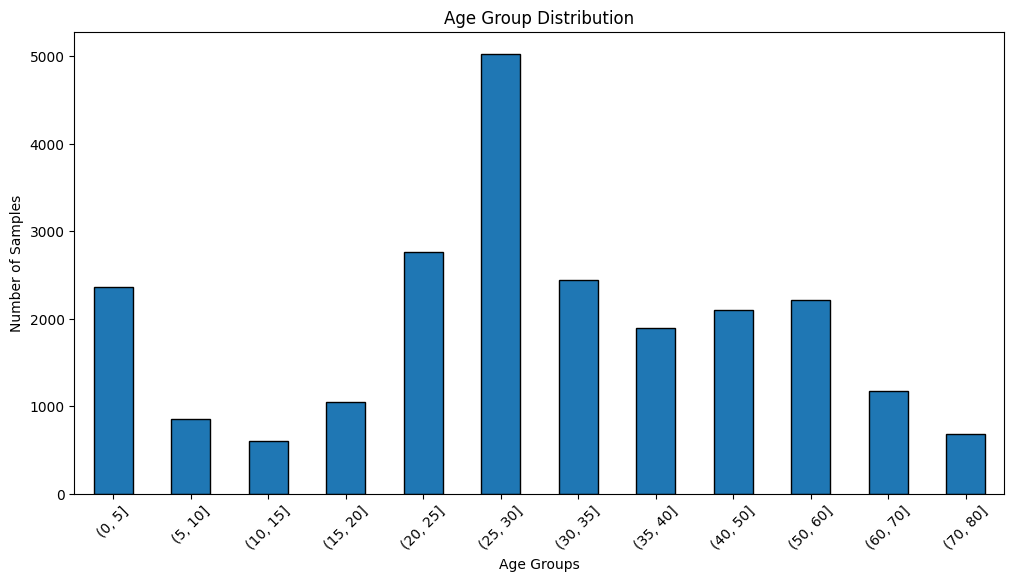

In [34]:
# Option 1: Histogram of Ages
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=range(0, data['age'].max() + 1, 1), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Samples')
plt.xticks(range(0, data['age'].max() + 1, 5))  # Adjust x-ticks every 5 years
plt.show()

# Option 2: Bar Chart with Age Bins
# Define age bins
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
data['age_group'] = pd.cut(data['age'], bins=age_bins)

# Count samples in each age group
age_group_counts = data['age_group'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

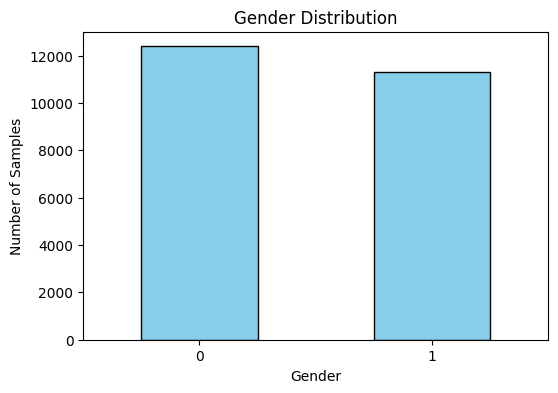

In [35]:
# Get counts of each gender category
gender_counts = data['gender'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()


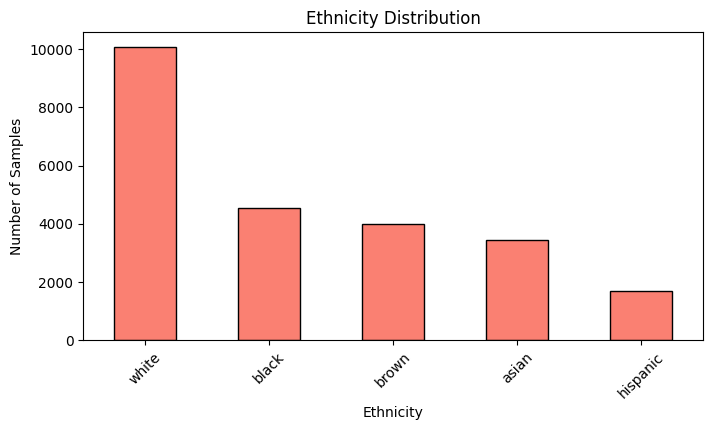

In [36]:
# Get counts of each ethnicity category
ethnicity_counts = data['ethnicity'].value_counts()

# Map numerical codes to ethnicity labels if necessary
# Assuming you have a mapping dictionary if 'ethnicity' is encoded numerically
ethnicity_mapping = {
    0: 'white',
    1: 'black',
    2: 'asian',
    3: 'brown',
    4: 'hispanic'
}

# If 'ethnicity' is encoded, map the codes to labels
if data['ethnicity'].dtype != 'object':
    ethnicity_counts.index = ethnicity_counts.index.map(ethnicity_mapping)

# Plot bar chart
plt.figure(figsize=(8, 4))
ethnicity_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


Gender Accuracy: 0.7977
Ethnicity Accuracy: 0.5508


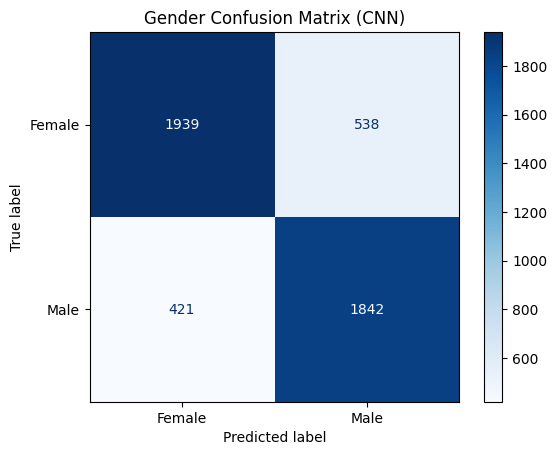

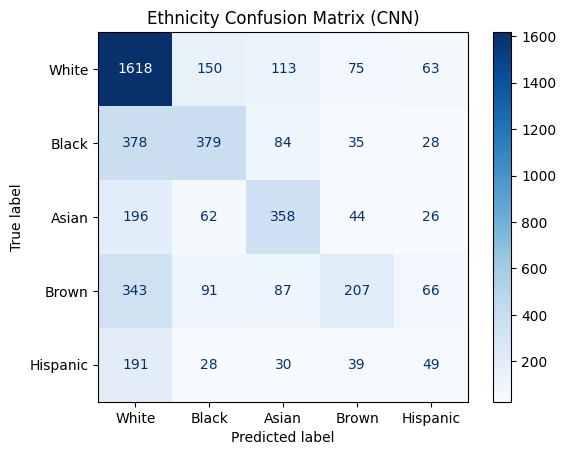

Gender ROC-AUC: 0.8575


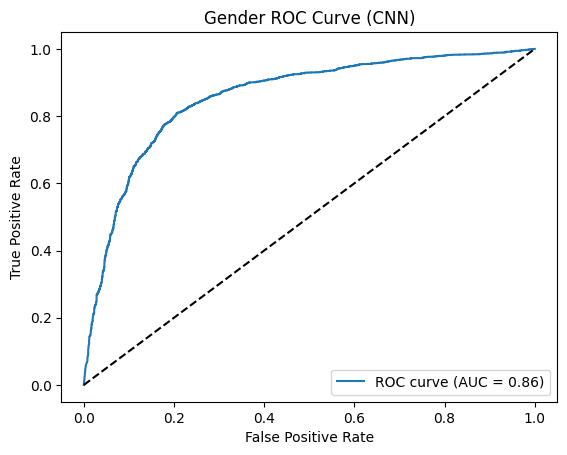

Age RMSE: 14.9608


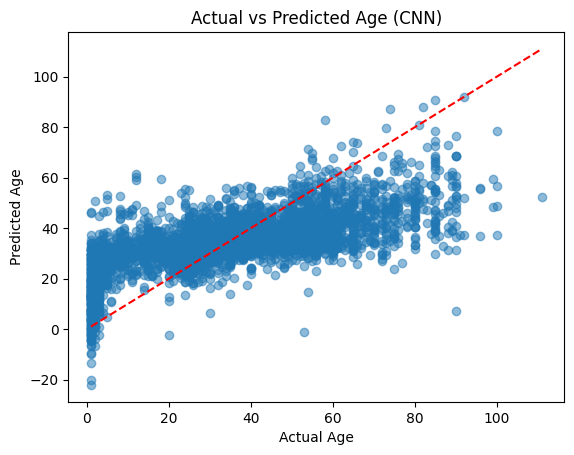

In [37]:
# CNN

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    mean_squared_error,
)
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model
# Assuming 'test_dataset' and 'test_loader' are ready

def evaluate_model(CNNmodel, test_loader):
    CNNmodel.eval()  # Set model to evaluation mode
    CNNdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    CNNmodel.to(CNNdevice)

    # Lists to store true labels and predictions
    all_gender_labels = []
    all_gender_preds = []
    all_gender_probs = []
    all_ethnicity_labels = []
    all_ethnicity_preds = []
    all_age_labels = []
    all_age_outputs = []

    with torch.no_grad():
        for images, gender_labels, ethnicity_labels, age_labels in test_loader:
            images = images.to(CNNdevice)
            gender_labels = gender_labels.to(CNNdevice)
            ethnicity_labels = ethnicity_labels.to(CNNdevice)
            age_labels = age_labels.to(CNNdevice)

            # Forward pass
            gender_logits, ethnicity_logits, age_output = CNNmodel(images)

            # Move tensors to CPU and convert to NumPy arrays
            gender_labels_np = gender_labels.cpu().numpy()
            ethnicity_labels_np = ethnicity_labels.cpu().numpy()
            age_labels_np = age_labels.cpu().numpy()

            # Get predictions and probabilities
            gender_probs = torch.softmax(gender_logits, dim=1)  # Probabilities for ROC-AUC
            gender_preds = torch.argmax(gender_probs, dim=1).cpu().numpy()
            ethnicity_preds = torch.argmax(ethnicity_logits, dim=1).cpu().numpy()
            age_outputs_np = age_output.squeeze().cpu().numpy()

            # Append to lists
            all_gender_labels.extend(gender_labels_np)
            all_gender_preds.extend(gender_preds)
            all_gender_probs.extend(gender_probs[:, 1].cpu().numpy())  # Assuming class 1 is 'Male'
            all_ethnicity_labels.extend(ethnicity_labels_np)
            all_ethnicity_preds.extend(ethnicity_preds)
            all_age_labels.extend(age_labels_np)
            all_age_outputs.extend(age_outputs_np)

    # Compute Gender Accuracy
    gender_accuracy = accuracy_score(all_gender_labels, all_gender_preds)
    print(f"Gender Accuracy: {gender_accuracy:.4f}")

    # Compute Ethnicity Accuracy
    ethnicity_accuracy = accuracy_score(all_ethnicity_labels, all_ethnicity_preds)
    print(f"Ethnicity Accuracy: {ethnicity_accuracy:.4f}")

    # Compute Gender Confusion Matrix
    gender_cm = confusion_matrix(all_gender_labels, all_gender_preds)
    ConfusionMatrixDisplay(confusion_matrix=gender_cm, display_labels=['Female', 'Male']).plot(cmap=plt.cm.Blues)
    plt.title('Gender Confusion Matrix (CNN)')
    plt.show()

    # Compute Ethnicity Confusion Matrix
    ethnicity_classes = ['White', 'Black', 'Asian', 'Brown', 'Hispanic']  # Replace with actual class names
    ethnicity_cm = confusion_matrix(all_ethnicity_labels, all_ethnicity_preds)
    ConfusionMatrixDisplay(confusion_matrix=ethnicity_cm, display_labels=ethnicity_classes).plot(cmap=plt.cm.Blues)
    plt.title('Ethnicity Confusion Matrix (CNN)')
    plt.show()

    # Compute ROC-AUC for Gender
    gender_auc = roc_auc_score(all_gender_labels, all_gender_probs)
    print(f"Gender ROC-AUC: {gender_auc:.4f}")

    # Plot ROC Curve for Gender
    fpr, tpr, thresholds = roc_curve(all_gender_labels, all_gender_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {gender_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Gender ROC Curve (CNN)')
    plt.legend(loc='lower right')
    plt.show()

    # Compute RMSE for Age Regression
    # If age was normalized during training, denormalize it here
    # For example, if you divided by max_age during training:
    max_age = data['age'].max()  # Replace 'data' with your actual DataFrame variable
    all_age_labels_denorm = [label * max_age for label in all_age_labels]
    all_age_outputs_denorm = [output * max_age for output in all_age_outputs]

    age_rmse = np.sqrt(mean_squared_error(all_age_labels_denorm, all_age_outputs_denorm))
    print(f"Age RMSE: {age_rmse:.4f}")

    # Optionally, plot predicted vs actual ages
    plt.figure()
    plt.scatter(all_age_labels_denorm, all_age_outputs_denorm, alpha=0.5)
    plt.plot([min(all_age_labels_denorm), max(all_age_labels_denorm)], [min(all_age_labels_denorm), max(all_age_labels_denorm)], 'r--')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('Actual vs Predicted Age (CNN)')
    plt.show()

# Usage example
# Assuming 'test_loader' is your DataLoader for the test set
evaluate_model(CNNmodel, test_loader)


Gender Accuracy: 0.7835
Ethnicity Accuracy: 0.5736


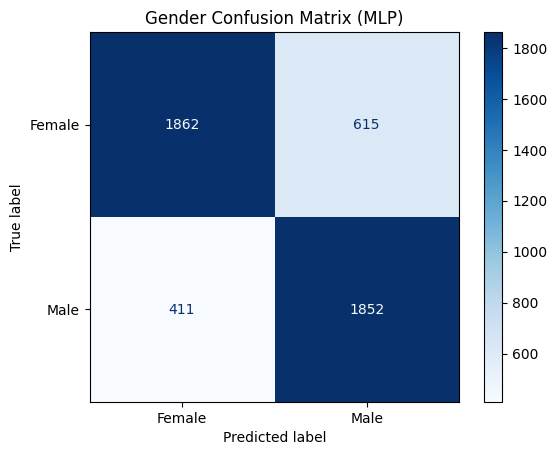

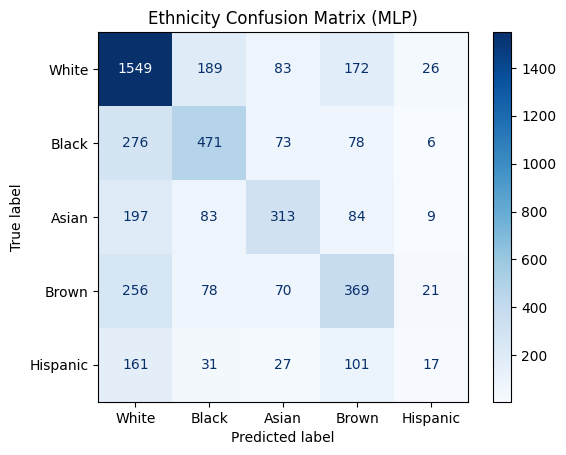

Gender ROC-AUC: 0.8500


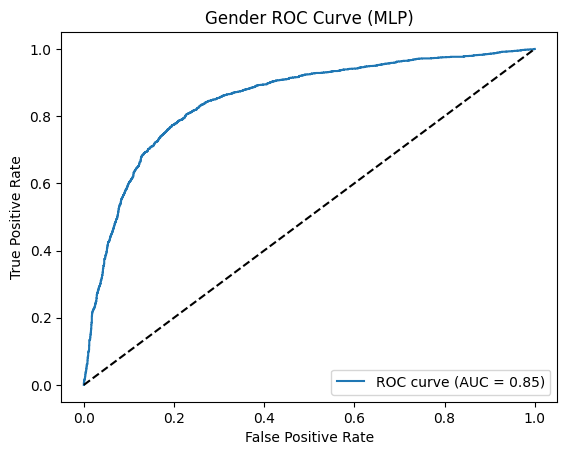

Age RMSE: 20.0111


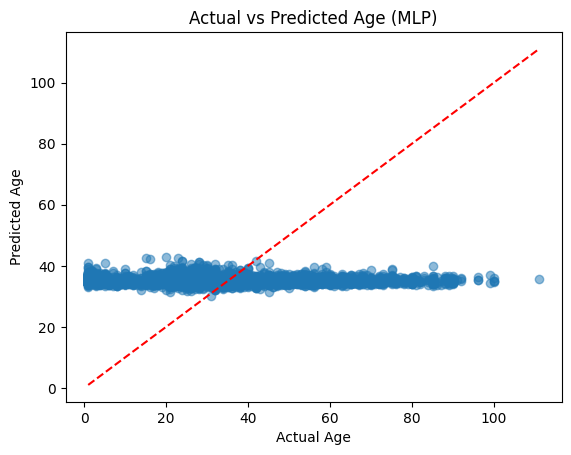

In [ ]:
# MLP

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    mean_squared_error,
)
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model
# Assuming 'test_dataset' and 'test_loader' are ready

def evaluate_model(MLPmodel, test_loader):
    MLPmodel.eval()  # Set model to evaluation mode
    MLPdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    MLPmodel.to(MLPdevice)

    # Lists to store true labels and predictions
    all_gender_labels = []
    all_gender_preds = []
    all_gender_probs = []
    all_ethnicity_labels = []
    all_ethnicity_preds = []
    all_age_labels = []
    all_age_outputs = []

    with torch.no_grad():
        for images, gender_labels, ethnicity_labels, age_labels in test_loader:
            images = images.to(MLPdevice).view(images.size(0), -1)
            
            labels = {
                'age': ages.to(MLPdevice),
                'gender': genders.to(MLPdevice),
                'ethnicity': ethnicities.to(MLPdevice)
            }

            
            # Forward pass
            outputs = MLPmodel(images)

            # Move tensors to CPU and convert to NumPy arrays
            gender_labels_np = gender_labels.cpu().numpy()
            ethnicity_labels_np = ethnicity_labels.cpu().numpy()
            age_labels_np = age_labels.cpu().numpy()

            # Get predictions and probabilities
            gender_probs = torch.softmax(outputs['gender'], dim=1)  # Probabilities for ROC-AUC
            gender_preds = torch.argmax(outputs['gender'], dim=1).cpu().numpy()
            ethnicity_preds = torch.argmax(outputs['ethnicity'], dim=1).cpu().numpy()
            age_outputs_np = outputs['age'].squeeze().cpu().numpy()

            # Append to lists
            all_gender_labels.extend(gender_labels_np)
            all_gender_preds.extend(gender_preds)
            all_gender_probs.extend(gender_probs[:, 1].cpu().numpy())  # Assuming class 1 is 'Male'
            all_ethnicity_labels.extend(ethnicity_labels_np)
            all_ethnicity_preds.extend(ethnicity_preds)
            all_age_labels.extend(age_labels_np)
            all_age_outputs.extend(age_outputs_np)

    # Compute Gender Accuracy
    gender_accuracy = accuracy_score(all_gender_labels, all_gender_preds)
    print(f"Gender Accuracy: {gender_accuracy:.4f}")

    # Compute Ethnicity Accuracy
    ethnicity_accuracy = accuracy_score(all_ethnicity_labels, all_ethnicity_preds)
    print(f"Ethnicity Accuracy: {ethnicity_accuracy:.4f}")

    # Compute Gender Confusion Matrix
    gender_cm = confusion_matrix(all_gender_labels, all_gender_preds)
    ConfusionMatrixDisplay(confusion_matrix=gender_cm, display_labels=['Female', 'Male']).plot(cmap=plt.cm.Blues)
    plt.title('Gender Confusion Matrix (MLP)')
    plt.show()

    # Compute Ethnicity Confusion Matrix
    ethnicity_classes = ['White', 'Black', 'Asian', 'Brown', 'Hispanic']  # Replace with actual class names
    ethnicity_cm = confusion_matrix(all_ethnicity_labels, all_ethnicity_preds)
    ConfusionMatrixDisplay(confusion_matrix=ethnicity_cm, display_labels=ethnicity_classes).plot(cmap=plt.cm.Blues)
    plt.title('Ethnicity Confusion Matrix (MLP)')
    plt.show()

    # Compute ROC-AUC for Gender
    gender_auc = roc_auc_score(all_gender_labels, all_gender_probs)
    print(f"Gender ROC-AUC: {gender_auc:.4f}")

    # Plot ROC Curve for Gender
    fpr, tpr, thresholds = roc_curve(all_gender_labels, all_gender_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {gender_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Gender ROC Curve (MLP)')
    plt.legend(loc='lower right')
    plt.show()

    # Compute RMSE for Age Regression
    # If age was normalized during training, denormalize it here
    # For example, if you divided by max_age during training:
    max_age = data['age'].max()  # Replace 'data' with your actual DataFrame variable
    all_age_labels_denorm = [label * max_age for label in all_age_labels]
    all_age_outputs_denorm = [output * max_age for output in all_age_outputs]

    age_rmse = np.sqrt(mean_squared_error(all_age_labels_denorm, all_age_outputs_denorm))
    print(f"Age RMSE: {age_rmse:.4f}")

    # Optionally, plot predicted vs actual ages
    plt.figure()
    plt.scatter(all_age_labels_denorm, all_age_outputs_denorm, alpha=0.5)
    plt.plot([min(all_age_labels_denorm), max(all_age_labels_denorm)], [min(all_age_labels_denorm), max(all_age_labels_denorm)], 'r--')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('Actual vs Predicted Age (MLP)')
    plt.show()

# Usage example
# Assuming 'test_loader' is your DataLoader for the test set
evaluate_model(MLPmodel, test_loader)


Gender Accuracy: 0.7835
Ethnicity Accuracy: 0.5884


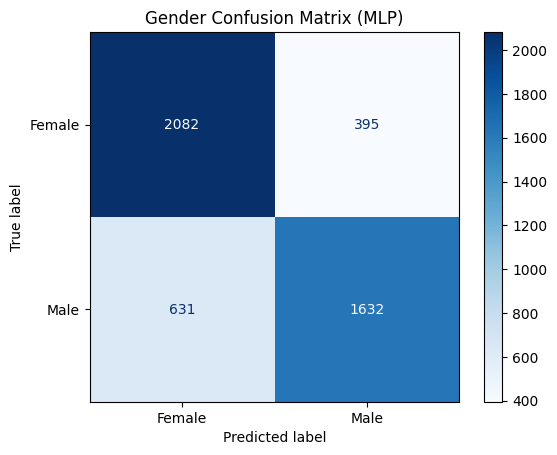

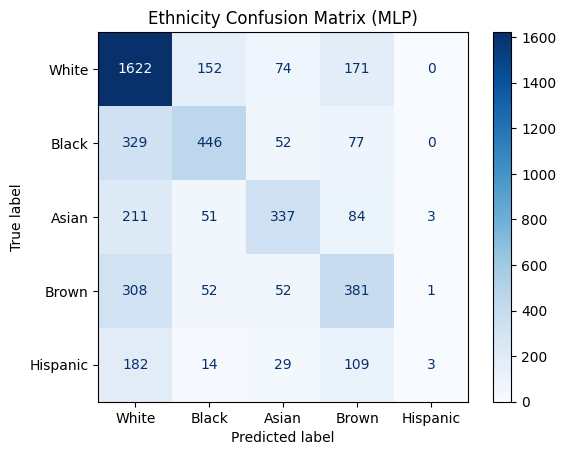

Gender ROC-AUC: 0.8593


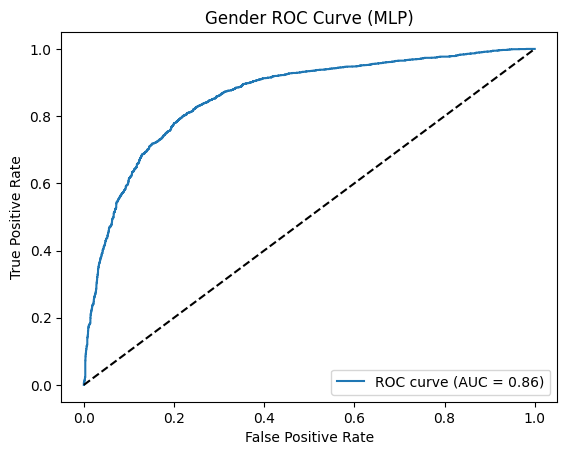

Age RMSE: 14.8240


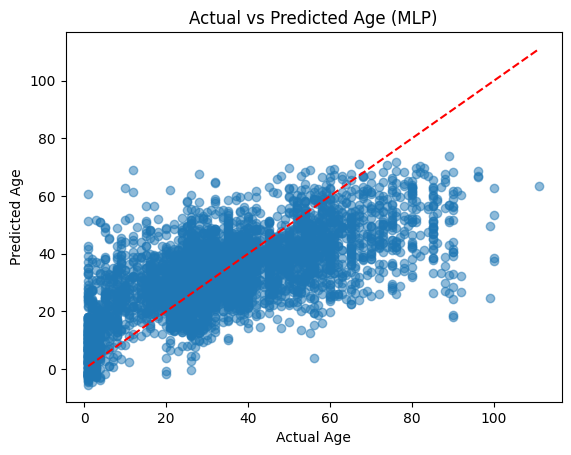

In [41]:
# LSTM

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    mean_squared_error,
)
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model
# Assuming 'test_dataset' and 'test_loader' are ready

def evaluate_model(LSTMmodel, test_loader):
    LSTMmodel.eval()  # Set model to evaluation mode
    LSTMdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    LSTMmodel.to(LSTMdevice)

    # Lists to store true labels and predictions
    all_gender_labels = []
    all_gender_preds = []
    all_gender_probs = []
    all_ethnicity_labels = []
    all_ethnicity_preds = []
    all_age_labels = []
    all_age_outputs = []

    with torch.no_grad():
        for images, gender_labels, ethnicity_labels, age_labels in test_loader:
            images = images.to(MLPdevice).view(images.size(0), 1, -1)
            
            labels = {
                'age': ages.to(LSTMdevice),
                'gender': genders.to(LSTMdevice),
                'ethnicity': ethnicities.to(LSTMdevice)
            }

            
            # Forward pass
            outputs = LSTMmodel(images)

            # Move tensors to CPU and convert to NumPy arrays
            gender_labels_np = gender_labels.cpu().numpy()
            ethnicity_labels_np = ethnicity_labels.cpu().numpy()
            age_labels_np = age_labels.cpu().numpy()

            # Get predictions and probabilities
            gender_probs = torch.softmax(outputs['gender'], dim=1)  # Probabilities for ROC-AUC
            gender_preds = torch.argmax(outputs['gender'], dim=1).cpu().numpy()
            ethnicity_preds = torch.argmax(outputs['ethnicity'], dim=1).cpu().numpy()
            age_outputs_np = outputs['age'].squeeze().cpu().numpy()

            # Append to lists
            all_gender_labels.extend(gender_labels_np)
            all_gender_preds.extend(gender_preds)
            all_gender_probs.extend(gender_probs[:, 1].cpu().numpy())  # Assuming class 1 is 'Male'
            all_ethnicity_labels.extend(ethnicity_labels_np)
            all_ethnicity_preds.extend(ethnicity_preds)
            all_age_labels.extend(age_labels_np)
            all_age_outputs.extend(age_outputs_np)

    # Compute Gender Accuracy
    gender_accuracy = accuracy_score(all_gender_labels, all_gender_preds)
    print(f"Gender Accuracy: {gender_accuracy:.4f}")

    # Compute Ethnicity Accuracy
    ethnicity_accuracy = accuracy_score(all_ethnicity_labels, all_ethnicity_preds)
    print(f"Ethnicity Accuracy: {ethnicity_accuracy:.4f}")

    # Compute Gender Confusion Matrix
    gender_cm = confusion_matrix(all_gender_labels, all_gender_preds)
    ConfusionMatrixDisplay(confusion_matrix=gender_cm, display_labels=['Female', 'Male']).plot(cmap=plt.cm.Blues)
    plt.title('Gender Confusion Matrix (MLP)')
    plt.show()

    # Compute Ethnicity Confusion Matrix
    ethnicity_classes = ['White', 'Black', 'Asian', 'Brown', 'Hispanic']  # Replace with actual class names
    ethnicity_cm = confusion_matrix(all_ethnicity_labels, all_ethnicity_preds)
    ConfusionMatrixDisplay(confusion_matrix=ethnicity_cm, display_labels=ethnicity_classes).plot(cmap=plt.cm.Blues)
    plt.title('Ethnicity Confusion Matrix (MLP)')
    plt.show()

    # Compute ROC-AUC for Gender
    gender_auc = roc_auc_score(all_gender_labels, all_gender_probs)
    print(f"Gender ROC-AUC: {gender_auc:.4f}")

    # Plot ROC Curve for Gender
    fpr, tpr, thresholds = roc_curve(all_gender_labels, all_gender_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {gender_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Gender ROC Curve (MLP)')
    plt.legend(loc='lower right')
    plt.show()

    # Compute RMSE for Age Regression
    # If age was normalized during training, denormalize it here
    # For example, if you divided by max_age during training:
    max_age = data['age'].max()  # Replace 'data' with your actual DataFrame variable
    all_age_labels_denorm = [label * max_age for label in all_age_labels]
    all_age_outputs_denorm = [output * max_age for output in all_age_outputs]

    age_rmse = np.sqrt(mean_squared_error(all_age_labels_denorm, all_age_outputs_denorm))
    print(f"Age RMSE: {age_rmse:.4f}")

    # Optionally, plot predicted vs actual ages
    plt.figure()
    plt.scatter(all_age_labels_denorm, all_age_outputs_denorm, alpha=0.5)
    plt.plot([min(all_age_labels_denorm), max(all_age_labels_denorm)], [min(all_age_labels_denorm), max(all_age_labels_denorm)], 'r--')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('Actual vs Predicted Age (MLP)')
    plt.show()

# Usage example
# Assuming 'test_loader' is your DataLoader for the test set
evaluate_model(LSTMmodel, test_loader)